In [27]:
import os
import sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.special import expit

import import_ipynb
from model import ModelLocBias as Model

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [28]:
FIG_FOLDER = 'fig'
SOURCE_FOLDER = os.path.join('data', 'source')
BACKUP_FOLDER = os.path.join('data', 'backup')
print(f"The source folder is: {os.path.abspath(SOURCE_FOLDER)}")
print(f"The figure folder is: {os.path.abspath(FIG_FOLDER)}")
print(f"The backup folder is: {os.path.abspath(BACKUP_FOLDER)}")

# Create folders
for f in SOURCE_FOLDER, FIG_FOLDER, BACKUP_FOLDER:
    os.makedirs(f, exist_ok=True)

The source folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/source
The figure folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/fig
The backup folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/backup


In [29]:
positions = ['1195_131_vs_1195_517', '469_131_vs_469_517']
df_paths = [f"{BACKUP_FOLDER}/df_fit_overallA_ModelLocBias.csv"] + [f"{BACKUP_FOLDER}/df_fit_overallB_ModelLocBias_{pos}.csv" for pos in positions]
df_paths

['data/backup/df_fit_overallA_ModelLocBias.csv',
 'data/backup/df_fit_overallB_ModelLocBias_1195_131_vs_1195_517.csv',
 'data/backup/df_fit_overallB_ModelLocBias_469_131_vs_469_517.csv']

### Load the results

In [30]:
df_fit = pd.read_csv(df_paths[0], index_col=0)
for c in ("date_begin", "date_end"):
    df_fit[c] = pd.to_datetime(df_fit[c])
df_fit.drop(df_fit.filter(regex="Unname"),axis=1, inplace=True)
df_fit

,distortion,precision,risk_aversion,loc_bias,date_begin,date_end,monkey,condition,n
0,1.327775,0.285684,0.206004,0.051842,2020-02-22,2020-06-22,Ala,gain,8326
0,1.051529,0.231330,-0.582592,-0.071694,2020-02-22,2020-06-22,Ala,loss,8285
0,0.768159,0.447276,0.075584,-0.936214,2020-02-22,2020-06-22,Alv,gain,9996
0,0.462213,0.229596,-0.398661,-0.675575,2020-02-22,2020-06-22,Alv,loss,9988
0,0.915509,0.492803,-0.109141,-0.117283,2020-02-22,2020-06-22,Bar,gain,10361
0,0.769959,0.189979,-0.640682,-0.121369,2020-02-22,2020-06-22,Bar,loss,10365
0,0.250000,1.612589,0.083753,-10.000000,2020-02-23,2020-06-22,Ola,gain,5235
0,0.250000,0.330200,-0.903815,-1.570219,2020-02-23,2020-06-22,Ola,loss,5237
0,0.610421,0.704556,0.750000,2.518428,2020-05-20,2020-06-18,Yin,gain,389
0,0.888765,2.477640,0.571941,10.000000,2020-05-20,2020-06-19,Yin,loss,382


In [31]:
df_elo = pd.read_csv(os.path.join(BACKUP_FOLDER, "df_elo.csv"), index_col=0)
df_elo.index = pd.to_datetime(df_elo.index)
df_elo

,nem,yak,ner,yoh,nen,wot,pac,las,anu,ola,...,olg,jea,pat,bar,ces,lad,ber,dor,eri,fic
date,,,,,,,,,,,,,,,,,,,,,
2016-10-25,1024,1009,1018,984,991,1010,991,982,991,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-26,1032,1009,1018,1003,991,1010,982,964,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-27,1032,1009,1018,1003,991,1010,982,956,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-28,1041,1009,1018,1003,991,1010,982,956,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-29,1063,1009,1018,1011,991,1010,975,941,984,1008,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,938,1243,961,840,1018,1234,1379,713,1117,1287,...,933,760,841,1083,837,753,743,766,702,579
2020-10-22,970,1243,962,840,1018,1234,1347,716,1105,1296,...,935,755,841,1070,832,753,743,795,702,566
2020-10-23,971,1243,970,840,1018,1234,1347,735,1105,1296,...,920,751,841,1072,838,753,758,773,668,566


In [32]:
elo = []

for _, row in df_fit.iterrows():
        
    m = row.monkey
    begin = row.date_begin
    end = row.date_end
        
    df_elo_m = df_elo[m.lower()]
    df_elo_m = df_elo_m[(df_elo_m.index >= begin) & (df_elo_m.index <= end)]
    elo.append(np.mean(df_elo_m))
        

df_fit['elo'] = elo
df_fit

,distortion,precision,risk_aversion,loc_bias,date_begin,date_end,monkey,condition,n,elo
0,1.327775,0.285684,0.206004,0.051842,2020-02-22,2020-06-22,Ala,gain,8326,1106.786885
0,1.051529,0.231330,-0.582592,-0.071694,2020-02-22,2020-06-22,Ala,loss,8285,1106.786885
0,0.768159,0.447276,0.075584,-0.936214,2020-02-22,2020-06-22,Alv,gain,9996,1096.295082
0,0.462213,0.229596,-0.398661,-0.675575,2020-02-22,2020-06-22,Alv,loss,9988,1096.295082
0,0.915509,0.492803,-0.109141,-0.117283,2020-02-22,2020-06-22,Bar,gain,10361,998.040984
0,0.769959,0.189979,-0.640682,-0.121369,2020-02-22,2020-06-22,Bar,loss,10365,998.040984
0,0.250000,1.612589,0.083753,-10.000000,2020-02-23,2020-06-22,Ola,gain,5235,1426.305785
0,0.250000,0.330200,-0.903815,-1.570219,2020-02-23,2020-06-22,Ola,loss,5237,1426.305785
0,0.610421,0.704556,0.750000,2.518428,2020-05-20,2020-06-18,Yin,gain,389,894.800000
0,0.888765,2.477640,0.571941,10.000000,2020-05-20,2020-06-19,Yin,loss,382,895.096774


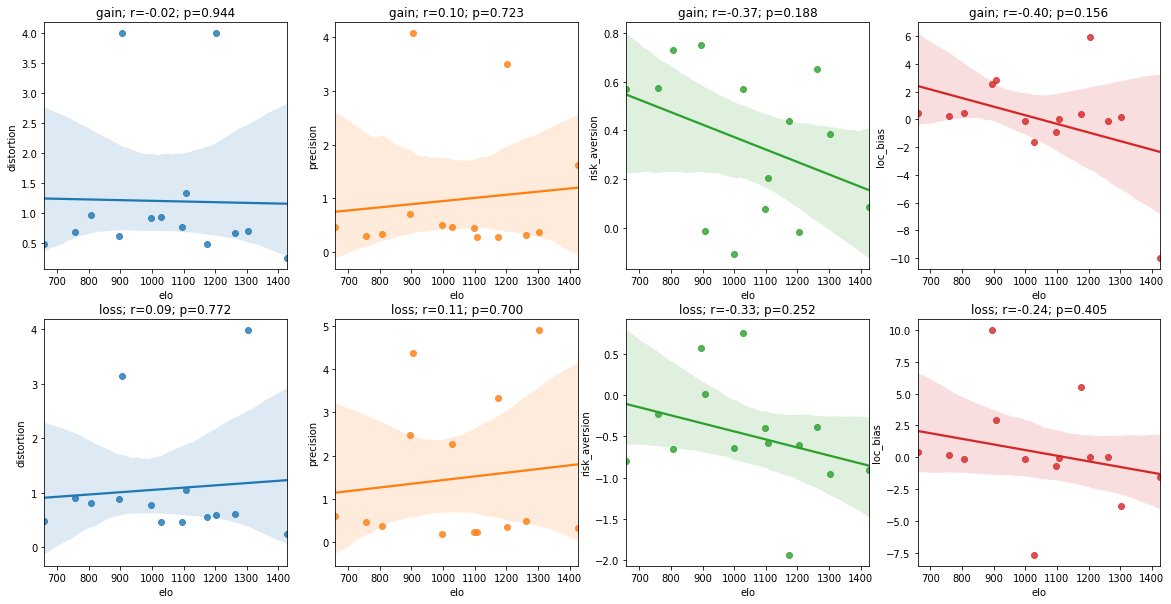

In [34]:
monkeys = df_fit.monkey.unique()
cond = df_fit.condition.unique()
n_param = len(Model.param_labels)

fig, axes = plt.subplots(figsize=(20, 10), nrows=2, ncols=n_param)

for i, cd in enumerate(cond):
    
    df = df_fit[df_fit.condition == cd]
    
    for j, pr in enumerate(Model.param_labels):
            
        r, p = scipy.stats.pearsonr(df.elo.values, df[pr].values)
           
        ax = axes[i, j]
        t = f"{cd}; r={r:.2f}; p={p:.3f}"
        ax.set_title(t)
            
        sns.regplot(x="elo", y=pr, data=df, color=f"C{j}", ax=ax)

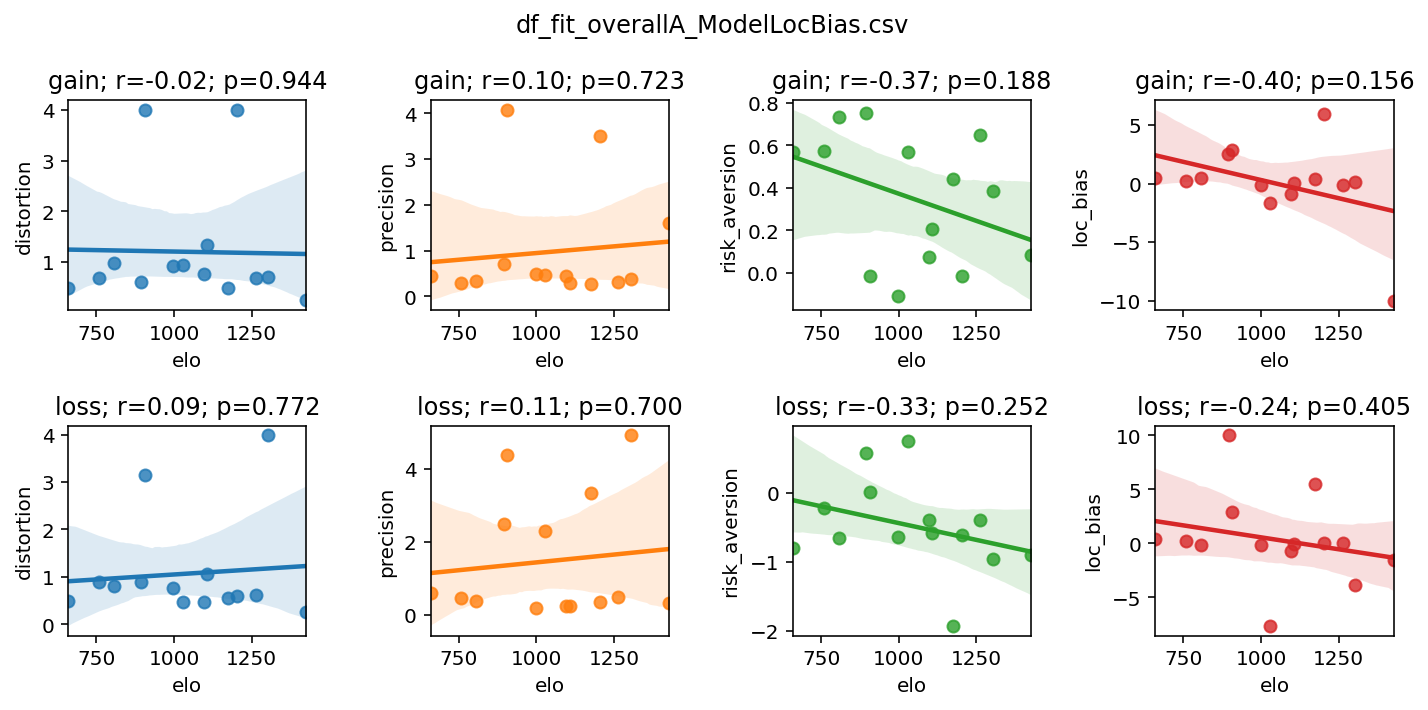

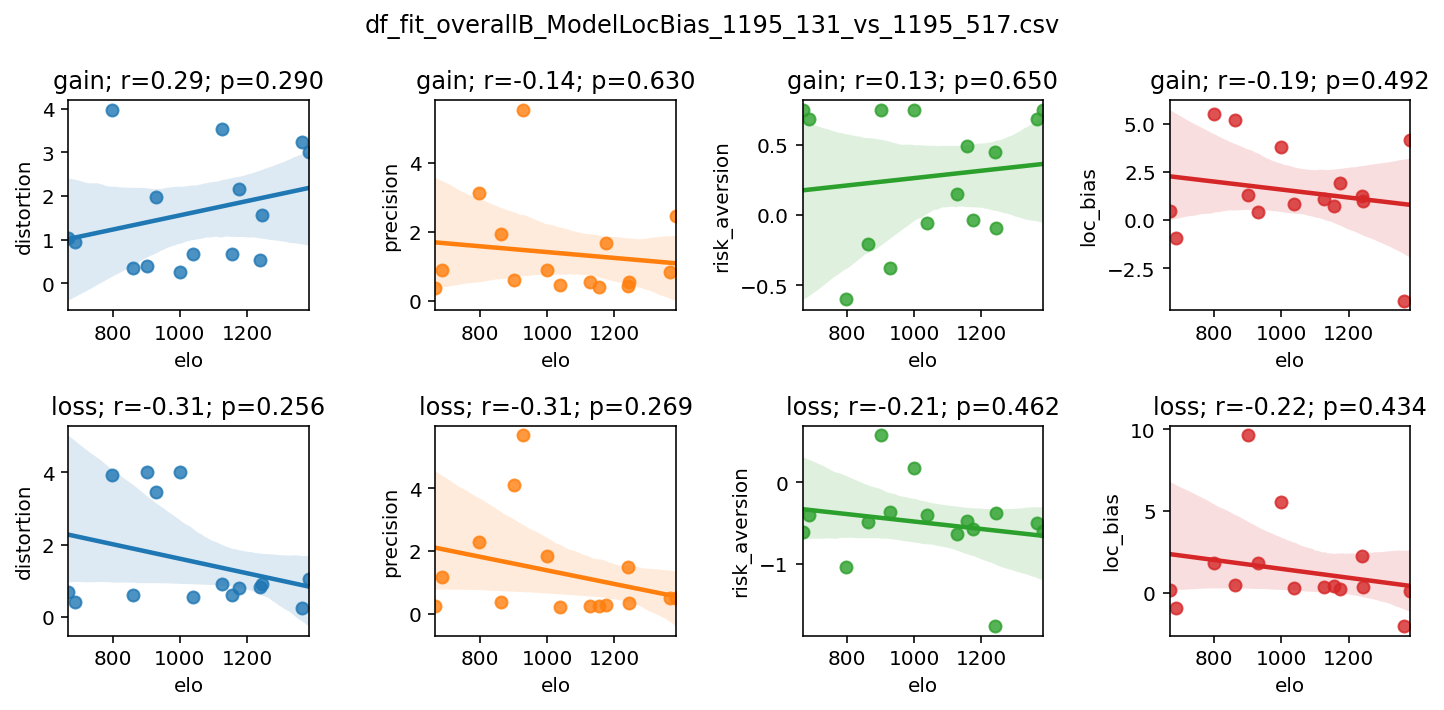

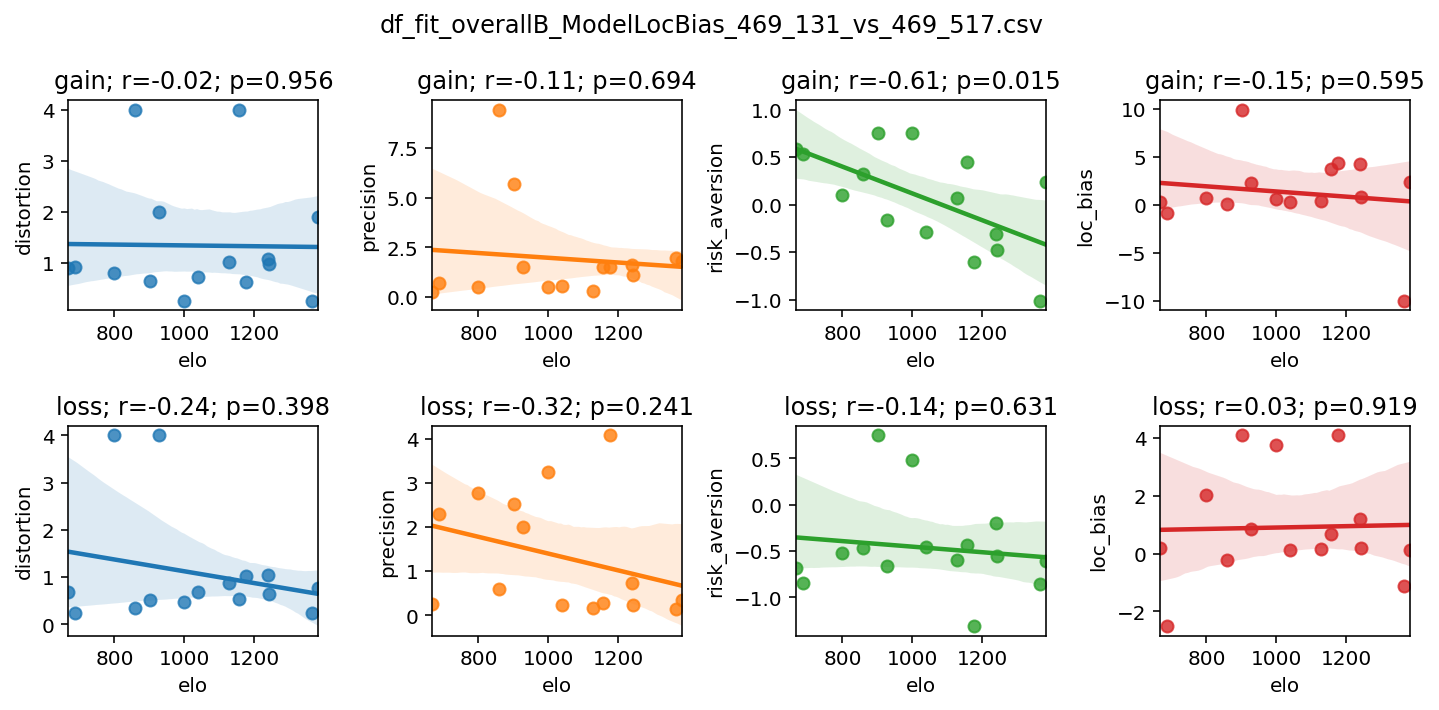

In [39]:
for df_p in df_paths:
    
    # Import fit data
    df_fit = pd.read_csv(df_p, index_col=0)
    for c in ("date_begin", "date_end"):
        df_fit[c] = pd.to_datetime(df_fit[c])
    df_fit.drop(df_fit.filter(regex="Unname"),axis=1, inplace=True)
    
    # Add elo
    elo = []

    for _, row in df_fit.iterrows():

        m = row.monkey
        begin = row.date_begin
        end = row.date_end

        df_elo_m = df_elo[m.lower()]
        df_elo_m = df_elo_m[(df_elo_m.index >= begin) & (df_elo_m.index <= end)]
        elo.append(np.mean(df_elo_m))
        
    df_fit['elo'] = elo
    
    # Plot
    monkeys = df_fit.monkey.unique()
    cond = df_fit.condition.unique()
    n_param = len(Model.param_labels)

    fig, axes = plt.subplots(figsize=(10, 5), nrows=len(cond), ncols=n_param)
    
    fig.suptitle(df_p.split("/")[-1])

    for i, cd in enumerate(cond):

        df = df_fit[df_fit.condition == cd]

        for j, pr in enumerate(Model.param_labels):

            r, p = scipy.stats.pearsonr(df.elo.values, df[pr].values)

            ax = axes[i, j]
            t = f"{cd}; r={r:.2f}; p={p:.3f}"
            ax.set_title(t)

            sns.regplot(x="elo", y=pr, data=df, color=f"C{j}", ax=ax)
    plt.tight_layout()
    plt.show()

In [ ]:
for df_p in df_paths:
    
    try:
    
        # Import fit data
        df_fit = pd.read_csv(df_p, index_col=0)
        for c in ("date_begin", "date_end"):
            df_fit[c] = pd.to_datetime(df_fit[c])
        df_fit.drop(df_fit.filter(regex="Unname"),axis=1, inplace=True)
        
    except:
        print(df_p)

In [ ]:
df_fit = pd.read_csv("data/backup/df_fit_overallB_ModelLocBias_469_412_vs_1195_412.csv", index_col=0)
df_fit